# Support Vector Machines
A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.

It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox.

SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

This notebook will explain the core concepts of SVMs, how to use them, and how they work. 


## Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to import figures form
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "lecIV"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# for embedded video streaming
from IPython.display import HTML

# Linear SVM Classification 
The fundamental idea behind SVMs is best explained with some pictures.

The figure generated below, shows part of the iris dataset. Note that the two classes can clearly be separated easily with a straight line (they are linearly separable).

The left plot shows the decision boundaries of three possible linear classifiers.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classi‐ fier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes.

## This is called large margin classification.



In [19]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# X[-1] = [5, 0.25]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

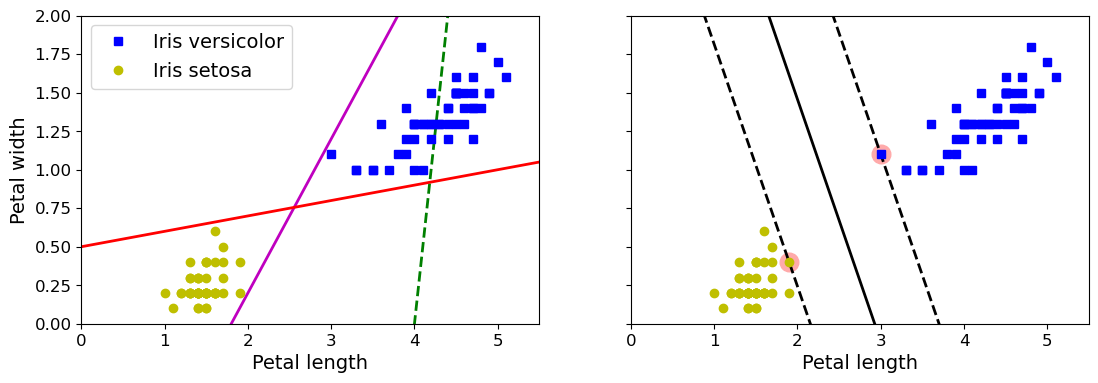

In [20]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

### Notice!!!
that adding more training instances “off the margin” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. (These instances which are called the support vectors are circled in Figure) 

## Sensitivity to feature scales

SVMs are sensitive to the feature scales! we will illustrate this issue by making some figures. 

As you can see in the below Figure: 

* on the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal.

* After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary looks much better (on the right plot). 

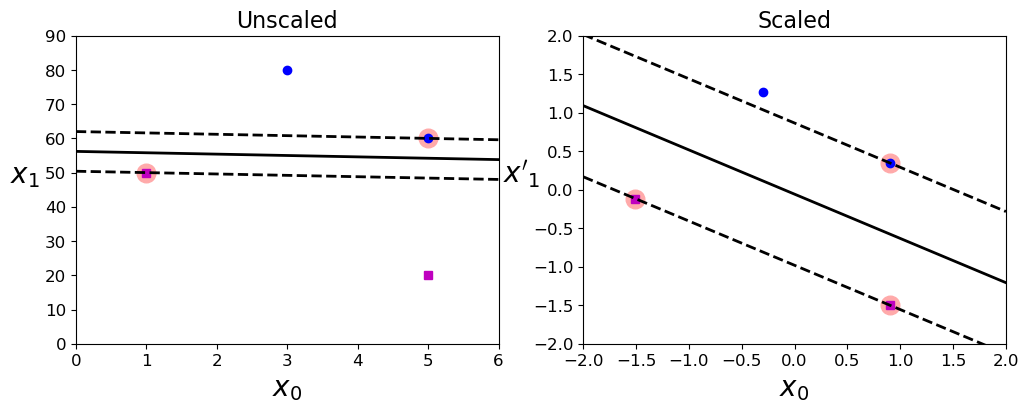

In [21]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2]);

## Sensitivity to outliers
If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification.

There are two main issues with hard margin classification:
* First, it only works if the data is linearly separable
* second it is quite sensitive to outliers.


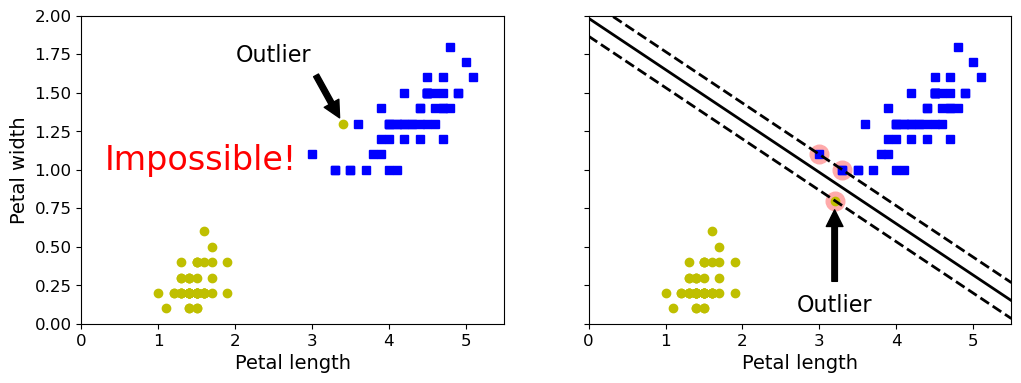

In [22]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(12,4), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

## Soft Margin SVM
To avoid these issues it is preferable to use a more flexible model.

The objective is to find a good balance between keeping the margin as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side).

**This is called soft margin classification.** 

In Scikit-Learn’s SVM classes, you can control this balance using the **C hyperparameter**: a smaller C  value leads to a wider street but more margin violations.



In [23]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [24]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, random_state=42)
svm_clf2 = LinearSVC(C=100, random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/Rooholah/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=42))])

In [25]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

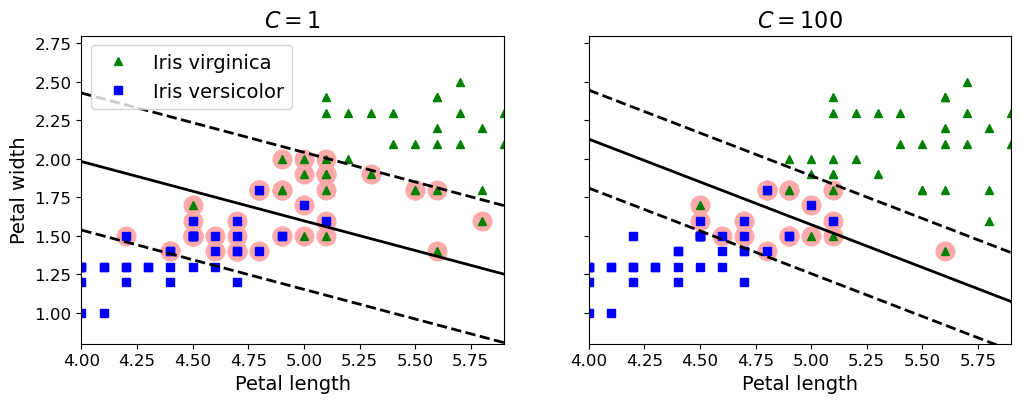

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8]);

Above figure shows the decision boundaries and margins of two soft margin SVM classifiers on a nonlinearly separable dataset.

* On the left, using a low C  value the margin is quite large, but many instances end up on the margin.
* On the right, using a high C value the classifier makes fewer margin violations but ends up with a smaller margin.

It seems likely that the first classifier will generalize better: in fact even on this training set it makes fewer prediction errors, since most of the margin violations are actually on the correct side of the decision boundary. 

### If your SVM model is overfitting, you can try regularizing it by reducing C. 

## Nonlinear Classification using Linear SVM
Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable.

One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

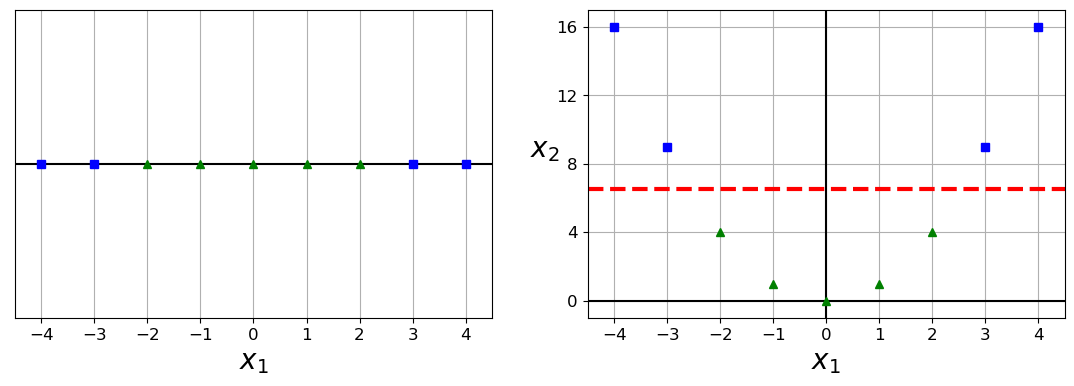

In [27]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

Consider the left plot in Figure: 

* It represents a simple dataset with just one feature x1.
* This dataset is not linearly separable, as you can see.
* If you add a second feature $x_2 = {x_1}^2$, the resulting 2D dataset is perfectly linearly separable. 

### implement this idea using Scikit-Learn
you can create a Pipeline  containing a PolynomialFeatures  transformer followed by a StandardScaler and a LinearSVC.

Let’s test this on the moons dataset (this is a toy dataset for binary classification in which the data points are sha‐ped as two interleaving half) 

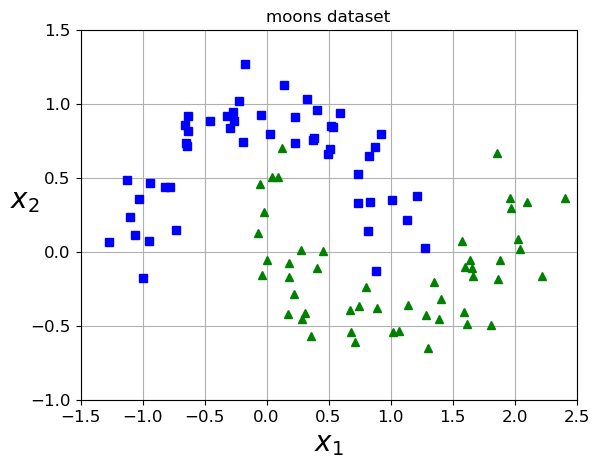

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('moons dataset')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = LinearSVC(C=10)
svm.fit(X_scaled, y)
y_pred = svm.predict(X_scaled)

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)
polynomial_svm_clf.predict(X)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, random_state=42))])

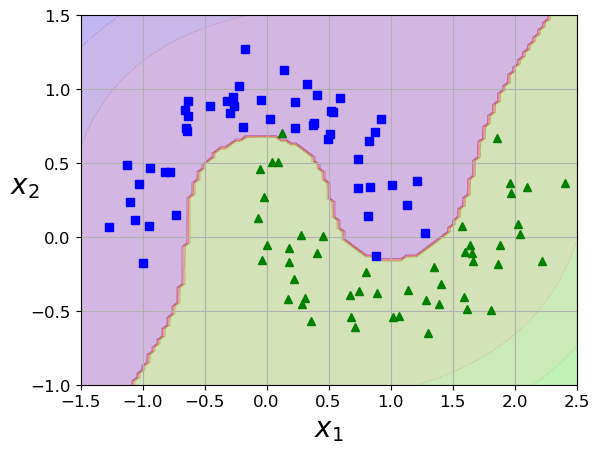

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial Kernel
Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a **low polynomial degree it cannot deal with very complex datasets**, and with a **high polynomial degree it creates a huge number of features, making the model too slow**.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the **kernel trick**.

It makes it possible to get the same result as if you added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features.

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

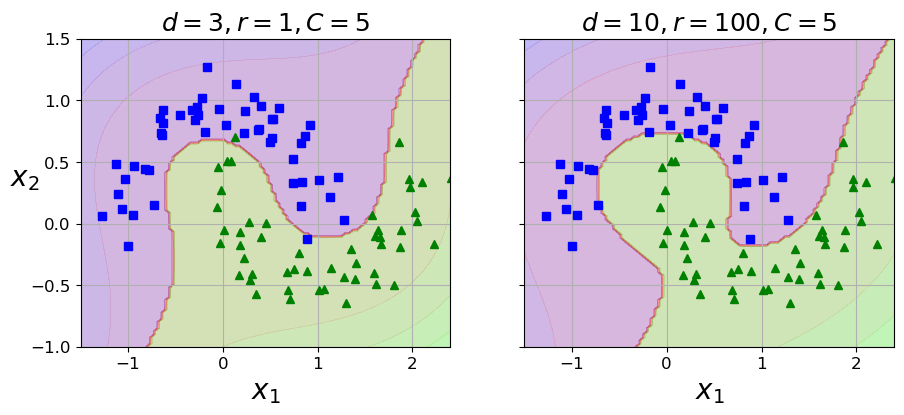

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

This figure trains an SVM classifier using a 3rd-degree polynomial kernel. It is represented on the left.

On the right is another SVM classifier using a 10th-degree polynomial kernel.

Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it.

The hyperparameter coef0  controls how much the model is influenced by high-degree polynomials versus low-degree polynomials. 

## Gaussian RBF Kernel
Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets.

However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them.

$\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp(-\gamma \|\mathbf {x} -\mathbf {x'} \|^{2})$

The RBF kernel works by mapping the data into a high-dimensional space by finding the dot products and squares of all the features in the dataset and then performing the classification using the basic idea of Linear SVM.

<!-- 
<center>
<img src="images/lecIV/rbf.png">
</center> -->

Let’s try the Gaussian RBF kernel using the SVC class: 

In [34]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

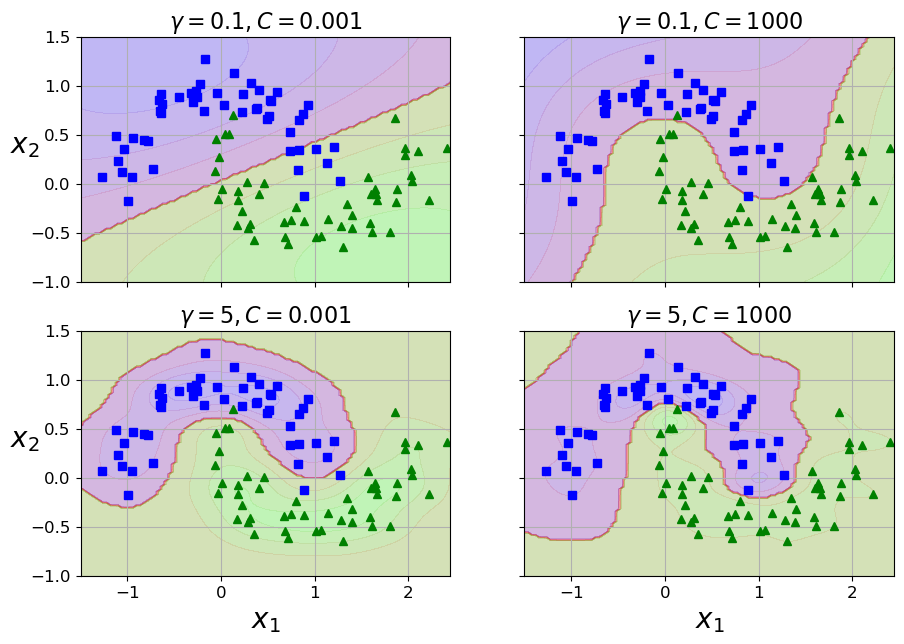

In [35]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

# Parameter Search

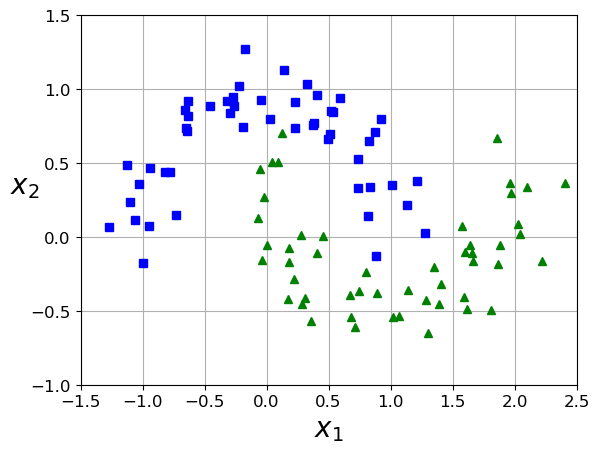

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [37]:
from sklearn.svm import SVC
import numpy as np

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 10, 100, 1000, 10000]
cv = KFold(n_splits=5, random_state=0)

for kernel in kernels:
  for c in C:
    model = SVC(kernel=kernel, C=c, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv)

    print(f'{kernel}, {c} - mean acc: {np.mean(scores)}')

/Users/Rooholah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


linear, 1 - mean acc: 0.85
linear, 10 - mean acc: 0.8299999999999998
linear, 100 - mean acc: 0.8400000000000001
linear, 1000 - mean acc: 0.8400000000000001
linear, 10000 - mean acc: 0.8400000000000001
poly, 1 - mean acc: 0.8300000000000001
poly, 10 - mean acc: 0.8699999999999999
poly, 100 - mean acc: 0.86
poly, 1000 - mean acc: 0.86
poly, 10000 - mean acc: 0.86
rbf, 1 - mean acc: 0.9400000000000001
rbf, 10 - mean acc: 0.9800000000000001
rbf, 100 - mean acc: 0.97
rbf, 1000 - mean acc: 0.96
rbf, 10000 - mean acc: 0.96
sigmoid, 1 - mean acc: 0.6700000000000002
sigmoid, 10 - mean acc: 0.5900000000000001
sigmoid, 100 - mean acc: 0.5900000000000001
sigmoid, 1000 - mean acc: 0.5900000000000001
sigmoid, 10000 - mean acc: 0.5900000000000001


**Thanks to SKleanr, we can do this procedure in more systematic way using `GridSearchCV`**

In [38]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, random_state=0)
grid_search = GridSearchCV(model, param_grid={'kernel': kernels, 'C': C},
                           scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

grid_search.fit(X, y)

print(f'Best parameters for SVM: { grid_search.best_params_} with score: {grid_search.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/Rooholah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s


Best parameters for SVM: {'C': 10, 'kernel': 'rbf'} with score: 0.9800000000000001


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


# Overfitting, Underfitting

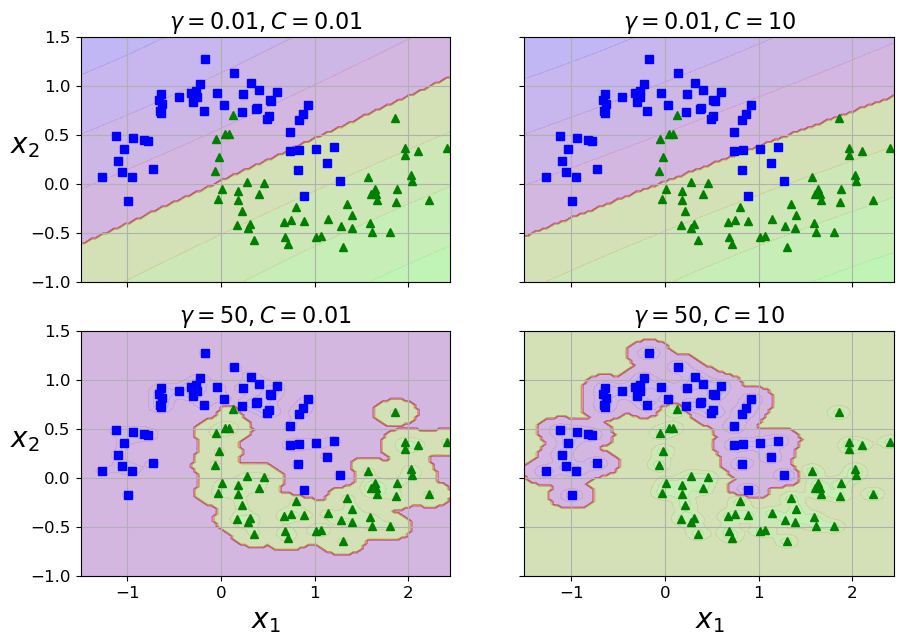

In [43]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.01, 50
C1, C2 = 0.01, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C = [0.01, 10, 100]
gammas = [0.01, 50, 100]
cv = KFold(n_splits=5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for c in C:
  for g in gammas:
    model = SVC(kernel='rbf', C=c, gamma=g, random_state=0)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f'C: {c}, gamma: {g} - mean train acc: {acc_train} - mean test acc: {acc_test}')

C: 0.01, gamma: 0.01 - mean train acc: 0.8 - mean test acc: 0.75
C: 0.01, gamma: 50 - mean train acc: 1.0 - mean test acc: 0.85
C: 0.01, gamma: 100 - mean train acc: 1.0 - mean test acc: 0.9
C: 10, gamma: 0.01 - mean train acc: 0.875 - mean test acc: 0.85
C: 10, gamma: 50 - mean train acc: 1.0 - mean test acc: 0.85
C: 10, gamma: 100 - mean train acc: 1.0 - mean test acc: 0.8
C: 100, gamma: 0.01 - mean train acc: 0.875 - mean test acc: 0.85
C: 100, gamma: 50 - mean train acc: 1.0 - mean test acc: 0.85
C: 100, gamma: 100 - mean train acc: 1.0 - mean test acc: 0.8


/Users/Rooholah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
